Contents

1. Importing Libraries and Data Set
2. Data Prep For Regression Analysis
3. Regression Analysis
4. Thoughts

# 1. Importing Libraries and Data Set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Set path

path = r'/Users/danioprea/Desktop/Data Analytics/Coffee Quality Analysis - Dani Oprea'

In [4]:
# Import data set with pandas

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'coffee_final.pkl'))

In [5]:
df.head(50)

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,2021 / 2022,2022-09-21,...,10.0,8.58,89.33,11.8,0,0,green,3,"September 21st, 2023",High Rating
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,19,25 kg,2021 / 2022,2022-11-15,...,10.0,8.33,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",High Rating
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,2022,2022-09-21,...,10.0,8.25,87.17,11.8,0,0,green,0,"September 21st, 2023",High Rating
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde,2,24 kg,2022,2023-03-06,...,10.0,8.25,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",High Rating
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,10.0,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,10.0,8.08,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,DORMAN (T) LIMITED,320,60 kg,2022 / 2023,2023-02-01,...,10.0,8.00,86.50,11.0,0,0,greenish,0,"February 1st, 2024",High Rating


In [6]:
df.shape

(197, 28)

# 2. Data Prep For Regression Analysis

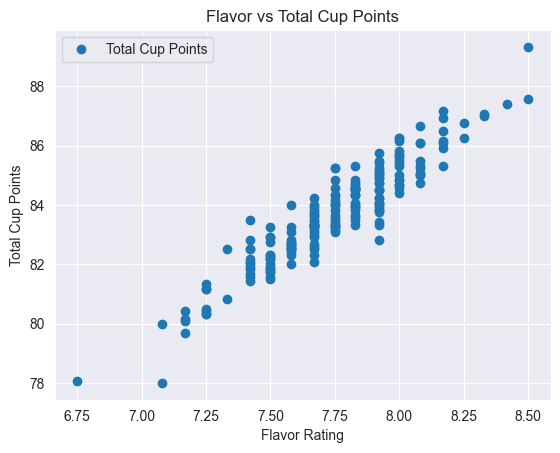

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Flavor', y='Total Cup Points',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Flavor vs Total Cup Points')  
plt.xlabel('Flavor Rating')  
plt.ylabel('Total Cup Points')  
plt.show()

#### Hypothesis

A high flavor rating is a strong indicator of a coffee being highly rated.

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Flavor'].values.reshape(-1,1)
y = df['Total Cup Points'].values.reshape(-1,1)

In [9]:
X

array([[8.5 ],
       [8.5 ],
       [8.42],
       [8.17],
       [8.33],
       [8.33],
       [8.17],
       [8.25],
       [8.08],
       [8.17],
       [8.25],
       [8.  ],
       [8.  ],
       [8.17],
       [8.  ],
       [8.08],
       [8.08],
       [8.17],
       [8.17],
       [8.  ],
       [7.92],
       [8.  ],
       [8.  ],
       [8.  ],
       [7.92],
       [8.08],
       [8.  ],
       [7.92],
       [8.  ],
       [8.  ],
       [8.17],
       [7.83],
       [8.08],
       [7.75],
       [7.92],
       [8.08],
       [7.75],
       [7.92],
       [7.92],
       [8.08],
       [7.92],
       [7.92],
       [8.08],
       [8.08],
       [8.  ],
       [7.92],
       [7.92],
       [8.  ],
       [8.  ],
       [7.75],
       [7.83],
       [7.92],
       [7.92],
       [7.83],
       [8.08],
       [8.  ],
       [8.  ],
       [7.83],
       [7.83],
       [7.83],
       [7.75],
       [7.83],
       [8.  ],
       [7.83],
       [7.83],
       [7.92],
       [7.

In [10]:
y

array([[89.33],
       [87.58],
       [87.42],
       [87.17],
       [87.08],
       [87.  ],
       [86.92],
       [86.75],
       [86.67],
       [86.5 ],
       [86.25],
       [86.25],
       [86.25],
       [86.17],
       [86.17],
       [86.08],
       [86.08],
       [86.08],
       [85.92],
       [85.83],
       [85.75],
       [85.67],
       [85.67],
       [85.58],
       [85.5 ],
       [85.5 ],
       [85.5 ],
       [85.42],
       [85.42],
       [85.33],
       [85.33],
       [85.33],
       [85.33],
       [85.25],
       [85.25],
       [85.25],
       [85.25],
       [85.17],
       [85.08],
       [85.08],
       [85.08],
       [85.  ],
       [85.  ],
       [85.  ],
       [85.  ],
       [84.92],
       [84.92],
       [84.83],
       [84.83],
       [84.83],
       [84.83],
       [84.75],
       [84.75],
       [84.75],
       [84.75],
       [84.67],
       [84.67],
       [84.67],
       [84.58],
       [84.58],
       [84.58],
       [84.58],
       [

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Regression Analysis

In [12]:
# Create a regression object.

regression = LinearRegression() 

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

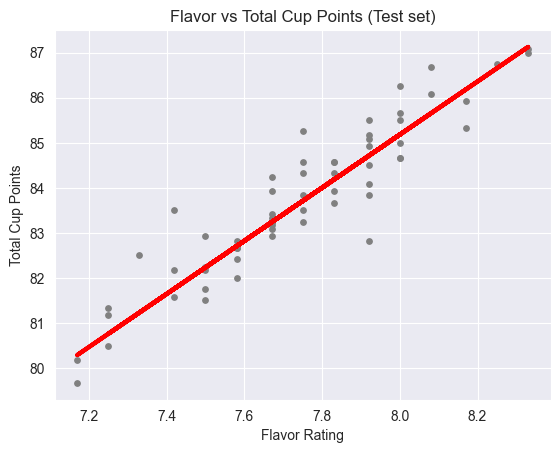

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Flavor vs Total Cup Points (Test set)')
plot_test.xlabel('Flavor Rating')
plot_test.ylabel('Total Cup Points')
plot_test.show()

#### Interpretation

The line does a pretty good job of fitting the data. Though there are some points that aren't right close up to the line, most are close and don't fall too far away.

In [16]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [17]:
# Print the model summary statistics. This is where we evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.89430142]]
Mean squared error:  0.39353941973587714
R2 score:  0.8607468310693519


In [18]:
y_predicted

array([[81.76195606],
       [85.18065088],
       [81.76195606],
       [83.70707553],
       [81.23146893],
       [83.70707553],
       [83.23553142],
       [80.75992482],
       [83.23553142],
       [86.18268212],
       [86.65422624],
       [87.12577035],
       [82.23350017],
       [81.76195606],
       [80.28838071],
       [82.70504429],
       [84.17861964],
       [84.17861964],
       [83.23553142],
       [82.23350017],
       [85.18065088],
       [83.70707553],
       [83.70707553],
       [83.23553142],
       [82.23350017],
       [83.23553142],
       [82.70504429],
       [85.652195  ],
       [83.23553142],
       [83.70707553],
       [84.70910677],
       [82.23350017],
       [83.23553142],
       [85.18065088],
       [83.70707553],
       [80.75992482],
       [87.12577035],
       [82.23350017],
       [83.23553142],
       [84.17861964],
       [82.70504429],
       [85.18065088],
       [84.70910677],
       [82.70504429],
       [84.17861964],
       [85

In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,83.50,81.761956
1,86.25,85.180651
2,81.58,81.761956
3,84.33,83.707076
4,82.50,81.231469
5,84.58,83.707076
6,83.33,83.235531
7,80.50,80.759925
8,83.92,83.235531
9,85.92,86.182682


#### Compare how the regression fits the training set

In [20]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [21]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [22]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[5.89430142]]
Mean squared error:  0.3465651504019444
R2 score:  0.8878540145875802


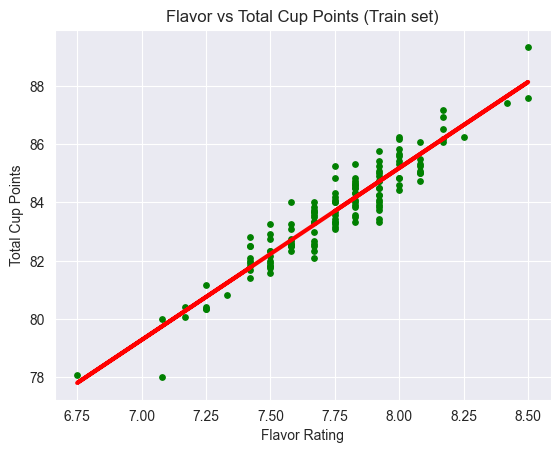

In [23]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Flavor vs Total Cup Points (Train set)')
plot_test.xlabel('Flavor Rating')
plot_test.ylabel('Total Cup Points')
plot_test.show()

# 4. Thoughts

The model performed very well! Both the test and training sets had low mean squared errors and high R2 scores. This indicates a strong relationship where the line fits very well and has a good fit. This confirms our hypothesis that a high flavor rating is a good indicator that a coffee will end up being highly rated. 

It is important to note that ratings are given by humans and are subjective to a reviewers taste. This means there could be some bias to our data.